In [1]:
import pandas as pd
import torch

In [75]:
data = pd.read_csv("./data/Pecan Street Smart Meter Data/load_wt_solar_208_customers.csv")
data['local_15min'] = pd.to_datetime(data['local_15min'])

In [76]:
data[96*28-2:96*28+2]

,dataid,local_15min,use,gen,grid
2686,77,2015-10-30 23:30:00,1.645667,-0.005600,1.645667
2687,77,2015-10-30 23:45:00,0.537667,-0.005000,0.537667
2688,93,2015-10-03 00:00:00,0.297533,-0.008067,0.297533
2689,93,2015-10-03 00:15:00,2.041533,-0.009533,2.041533


In [77]:

data.iloc[28*96:29*96]

,dataid,local_15min,use,gen,grid
2688,93,2015-10-03 00:00:00,0.297533,-0.008067,0.297533
2689,93,2015-10-03 00:15:00,2.041533,-0.009533,2.041533
2690,93,2015-10-03 00:30:00,3.542867,-0.011000,3.542867
2691,93,2015-10-03 00:45:00,0.799267,-0.008600,0.799267
2692,93,2015-10-03 01:00:00,0.302000,-0.008200,0.302000
...,...,...,...,...,...
2779,93,2015-10-03 22:45:00,0.489733,-0.008000,0.489733
2780,93,2015-10-03 23:00:00,1.810133,-0.009267,1.810133
2781,93,2015-10-03 23:15:00,0.546200,-0.008333,0.546200
2782,93,2015-10-03 23:30:00,0.285200,-0.008000,0.285200


In [78]:
# Extract date and time
data['date'] = data['local_15min'].dt.date
data['time'] = data['local_15min'].dt.time

In [79]:
# Find the unique dates and times
unique_dates = data['date'].unique()
unique_times = data['time'].unique()
unique_dataid = data['dataid'].unique()

In [80]:
num_dates = len(unique_dates)
num_intervals = len(unique_times)
num_dataid = len(unique_dataid)

In [81]:
# Create a mapping of date and time to index
date_to_index = {date: idx for idx, date in enumerate(unique_dates)}
time_to_index = {time: idx for idx, time in enumerate(unique_times)}
dataid_to_index = {dataid: idx for idx, dataid in enumerate(unique_dataid)}

In [82]:
mean_by_dataid = list(data.groupby('dataid')['grid'].mean())
mean_by_dataid = torch.tensor(mean_by_dataid).view(-1, 1, 1)

# Initialize a new tensor for 'grid' values, missing value replaced by mean
tensor_grid = mean_by_dataid.repeat(1,num_dates,num_intervals)

# Fill the tensor with 'grid' values
for _, row in data.iterrows():
    dataid_index = dataid_to_index[row['dataid']]
    date_index = date_to_index[row['date']]
    time_index = time_to_index[row['time']]
    tensor_grid[dataid_index, date_index, time_index] = row['grid']

torch.save(tensor_grid, "./data/Pecan Street Smart Meter Data/loads.pt")

In [83]:
mean_by_dataid = list(data.groupby('dataid')['gen'].mean())
mean_by_dataid = torch.tensor(mean_by_dataid).view(-1, 1, 1)

# Initialize a new tensor for 'gen' values, missing value replaced by mean
tensor_gen = mean_by_dataid.repeat(1,num_dates,num_intervals)

# Fill the tensor with 'gen' values
for _, row in data.iterrows():
    dataid_index = dataid_to_index[row['dataid']]
    date_index = date_to_index[row['date']]
    time_index = time_to_index[row['time']]
    tensor_gen[dataid_index, date_index, time_index] = row['gen']
torch.save(tensor_gen, "./data/Pecan Street Smart Meter Data/gens.pt")

In [85]:
tensor_gen.shape

torch.Size([208, 28, 96])

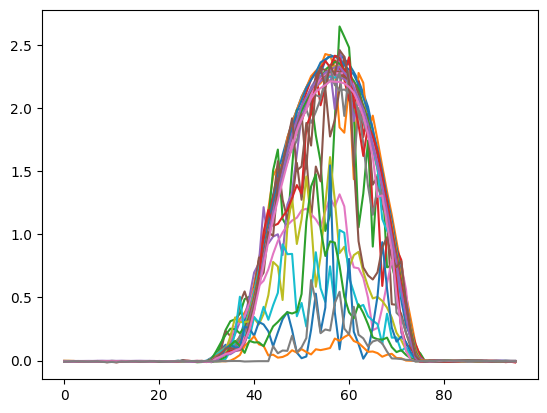

In [88]:
import matplotlib.pyplot as plt
for i in range(28):
    plt.plot(tensor_gen[0][i])